Fundamentals of Quantitative Biology 301400-1, WS2022

# **Python 05**

# Introduction

A fundamental task of working with biological or any kind of data is visualization. In this exercises you will get to know some more plotting functionalities on Python. The library we will be mostly using is `Seaborn`, it is largely based on Matplotlib which you have used previously, but offers a wider variety of easily accessible plotting functionalities.

## Working with pandas


Pandas is a powerful data manipulation and analysis library for Python.

It provides data structures like Series and DataFrame, which are ideal for working with structured data.


In [ ]:
# Importing Pandas
import pandas as pd

# Series: A one-dimensional labeled array capable of holding any data type.
# Example:
series_example = pd.Series([1, 3, 5, np.nan, 6, 8])
print("Series Example:\n", series_example)

# DataFrame: A two-dimensional labeled data structure with columns of potentially different types.
# Example:
df_example = pd.DataFrame({'A': 1.,
                           'B': pd.Timestamp('20230101'),
                           'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                           'D': np.array([3] * 4, dtype='int32'),
                           'E': pd.Categorical(["test", "train", "test", "train"]),
                           'F': 'foo'})
print("\nDataFrame Example:\n", df_example)


Series Example:
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

DataFrame Example:
      A          B    C  D      E    F
0  1.0 2023-01-01  1.0  3   test  foo
1  1.0 2023-01-01  1.0  3  train  foo
2  1.0 2023-01-01  1.0  3   test  foo
3  1.0 2023-01-01  1.0  3  train  foo


### Creating DataFrames

DataFrames are one of the most important structures in Pandas. They can be created in various ways.


In [ ]:
# From a dictionary of arrays/lists
df_from_dict = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': ['a', 'b', 'c', 'd']
})
print("DataFrame from Dictionary:\n", df_from_dict)

# From a list of dictionaries
df_from_list_of_dicts = pd.DataFrame([{'A': 1, 'B': 2}, {'A': 5, 'B': 10, 'C': 20}])
print("\nDataFrame from List of Dicts:\n", df_from_list_of_dicts)


DataFrame from Dictionary:
    A  B
0  1  a
1  2  b
2  3  c
3  4  d

DataFrame from List of Dicts:
    A   B     C
0  1   2   NaN
1  5  10  20.0


### Basic Operations with DataFrames

Let's explore some common operations like viewing data, selecting columns, and filtering rows.


In [ ]:
# Creating a sample DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie','David'],
    'Age': [25, 30, 35,18],
    'City': ['New York', 'Paris', 'Berlin', 'Berlin']
})

# Viewing the top rows of the DataFrame
print("Top rows:\n", df.head(2))

# Selecting a single column, which yields a Series
print("\nAge column:\n", df['Age'])

# Filtering rows based on a condition
print("\nRows where age is more than 28:\n", df[df['Age'] > 28])


Top rows:
     Name  Age      City
0  Alice   25  New York
1    Bob   30     Paris

Age column:
 0    25
1    30
2    35
3    18
Name: Age, dtype: int64

Rows where age is more than 28:
       Name  Age    City
1      Bob   30   Paris
2  Charlie   35  Berlin


### Data Manipulation

Pandas provides numerous functions for manipulating data, such as sorting, grouping, and reshaping data.


In [ ]:
# Sorting by a column
sorted_df = df.sort_values(by='Age')
print("Sorted by Age:\n", sorted_df)

# Grouping data
grouped_df = df.groupby('City').sum()
print("\nGrouped by City:\n", grouped_df)

# Pivoting data
pivoted_df = df.pivot(index='Name', columns='City', values='Age')
print("\nPivoted DataFrame:\n", pivoted_df)


Sorted by Age:
       Name  Age      City
3    David   18    Berlin
0    Alice   25  New York
1      Bob   30     Paris
2  Charlie   35    Berlin

Grouped by City:
           Age
City         
Berlin     53
New York   25
Paris      30

Pivoted DataFrame:
 City     Berlin  New York  Paris
Name                            
Alice       NaN      25.0    NaN
Bob         NaN       NaN   30.0
Charlie    35.0       NaN    NaN
David      18.0       NaN    NaN


<ipython-input-42-acd37afde287>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby('City').sum()


### # The 'melt' function in Pandas is used for transforming or reshaping data.

In [ ]:

weights = pd.DataFrame(
    {
     'Onion': [3.4, 3.1, 3.1, 3.2],
     'Garlic': [0.5, 0.3, 0.4, 0.3],
     'Potato': [7.4, 3.8, 6.5, 4.0]
    }
)

weights_long = pd.melt(weights, value_name='Weight', var_name='Veggie')
print(weights_long)


    Veggie  Weight
0    Onion     3.4
1    Onion     3.1
2    Onion     3.1
3    Onion     3.2
4   Garlic     0.5
5   Garlic     0.3
6   Garlic     0.4
7   Garlic     0.3
8   Potato     7.4
9   Potato     3.8
10  Potato     6.5
11  Potato     4.0


### Plotting dataframes with seaborn

Once the data is in the right format, the plotting is usually straightforward. The plotting functions can often just be called by specifying which variables should be on which axes.

In [ ]:
import seaborn as sns

# plot a barplot
sns.barplot(x='Veggie', y='Weight', data=weights_long)
plt.show()

# plot a barplot with the data points on top
sns.barplot(x='Veggie', y='Weight', data=weights_long)
sns.stripplot(x='Veggie', y='Weight', data=weights_long, color='black')
plt.show()

NameError: name 'weights_long' is not defined

# Exercise 1 -- More plots!  (40 pts)
In the cell below you can find a synthetic data set arranged in a dataframe.

(i) Visualize the data as a vertical barplot. (10 pts)

(ii) Visualize the data as a horizontal barplot. (10 pts)

(iii) Visualize the data as a boxplot. (10 pts)

(iv) Visualize the data as a violinplot. (10 pts)

Look up online resources for instructions on how to create these types of plots.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Generating the synthetic dataset
np.random.seed(0)
data = {
    "GeneExpression": np.random.normal(10, 2, 100),
    "ProteinConcentration": np.random.normal(15, 3, 100),
    "CellGrowthRate": np.random.uniform(0, 5, 100),
    "MetaboliteLevels": np.random.exponential(1, 100)
}
df = pd.DataFrame(data)


In [ ]:
df["GeneExpression"]

0     13.528105
1     10.800314
2     11.957476
3     14.481786
4     13.735116
        ...    
95    11.413146
96    10.021000
97    13.571741
98    10.253824
99    10.803979
Name: GeneExpression, Length: 100, dtype: float64

In [ ]:
# Solution

import seaborn as sns


mean_values = df.mean()

# Setting up the matplotlib figure
plt.figure(figsize=(15, 10))

# Creating a bar plot
plt.subplot(2, 2, 1)
sns.barplot(data=df)
plt.title('Bar Plot')

# Creating a box plot
plt.subplot(2, 2, 2)
sns.barplot(x=mean_values, y=mean_values.index)
plt.title('Box Plot 2')

# Creating a box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=df)
plt.title('Box Plot')

# Creating a violin plot
plt.subplot(2, 2, 4)
sns.violinplot(data=df)
plt.title('Violin Plot')

# # Creating a KDE plot for Gene Expression
# plt.subplot(2, 2, 4)
# sns.kdeplot(df['GeneExpression'], fill=True)
# plt.title('KDE Plot of Gene Expression')

# Displaying the plots
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

------------------------------------------------------------------------------------

Exercise 2:

# Exercise 2 -- The density distribution  (30 pts)


(i) Generate a probability density for the 'MetaboliteLevels' values using `kdeplot'. (10 pts)

(ii) Find the cutoff value in the distribution that marks the point beyond which the upper 5% of data lies, as relevant for a right-tailed significance test. Hint: There is a `percentile` method provided by the numpy module. (10 pts)

(iii) Color the area under the distribution curve that exceeds the threshold corresponding to the top 5% of the data. (10 pts)

<Axes: xlabel='MetaboliteLevels', ylabel='Density'>

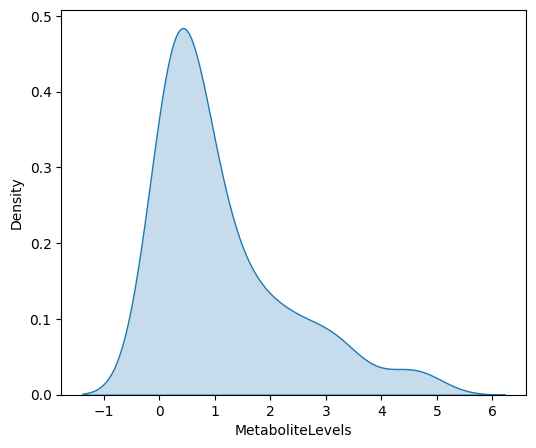

In [ ]:
    # "GeneExpression"
    # "ProteinConcentration"
    # "CellGrowthRate"
    # "MetaboliteLevels"

# Creating a kde plot
plt.figure(figsize=(6, 5))
sns.kdeplot(df['MetaboliteLevels'], fill=True)
# plt.title('KDE Plot of Gene Expression')

95th percentile (most significant level): 3.4821910490949226


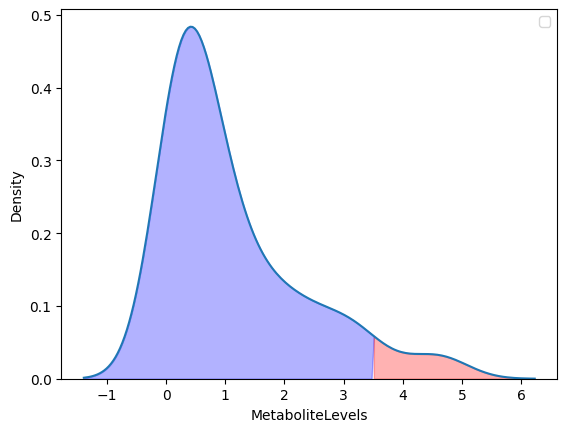

In [ ]:
# Assuming df['MetaboliteLevels'] is your data column
# Calculate the 95th percentile
percentile_95 = np.percentile(df['MetaboliteLevels'], 95)

print("95th percentile (most significant level):", percentile_95)

# Filling the area beyond the 95th percentile
kde = sns.kdeplot(df['MetaboliteLevels'])
x, y = kde.lines[0].get_data()
plt.fill_between(x, y, where=(x <= percentile_95), interpolate=True, color='blue', alpha=0.3)

plt.fill_between(x, y, where=(x > percentile_95), interpolate=True, color='red', alpha=0.3)

plt.legend()
plt.show()

# Exercise 3 -- Heatmaps  (30 pts)

The cell below will produce some synthetic data that mimics gene expression data for a number of samples.

(i) Plot the data as a seaborn heatmap. (10 pts)

The samples can now be clustered based the gene expression profiles.
This procedure can be involved, however, for simple cases there is a
very simple procedure using seaborns `clustermap`.

(ii) Plot the heatmap again using `clustermap' and with the method='ward'.
Comment on how to interpret the resulting plot briefly. Try out 2 other methods. (20 pts)


In [ ]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Define the number of genes and samples
n_genes = 40
n_samples = 15

# Generate synthetic gene expression data
# Using a mix of zeros and non-zero normally distributed values
data = np.random.normal(0, 1, (n_samples, n_genes))
data[data < .05] = 0  # Introducing sparsity, mimicking real gene expression data

# Create gene names and sample IDs
genes = [f'Gene_{i+1}' for i in range(n_genes)]
sample_ids = [f'Sample_{i+1}' for i in range(n_samples)]

# Create the DataFrame
df_gene_expression = pd.DataFrame(data, index=sample_ids, columns=genes)


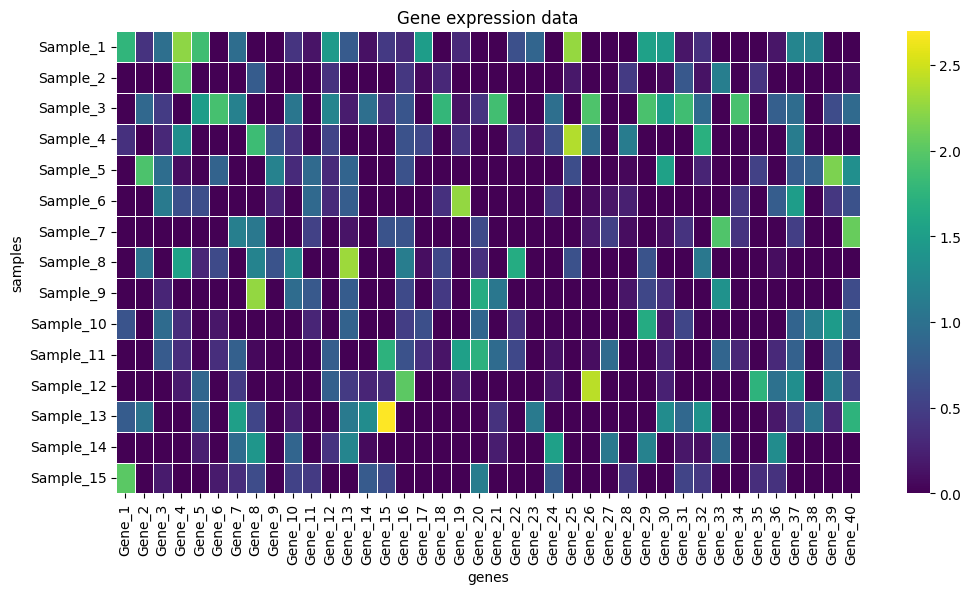

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.heatmap(df_gene_expression, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Gene expression data')
plt.xlabel('genes')
plt.ylabel('samples')

# Display the heatmap
plt.show()


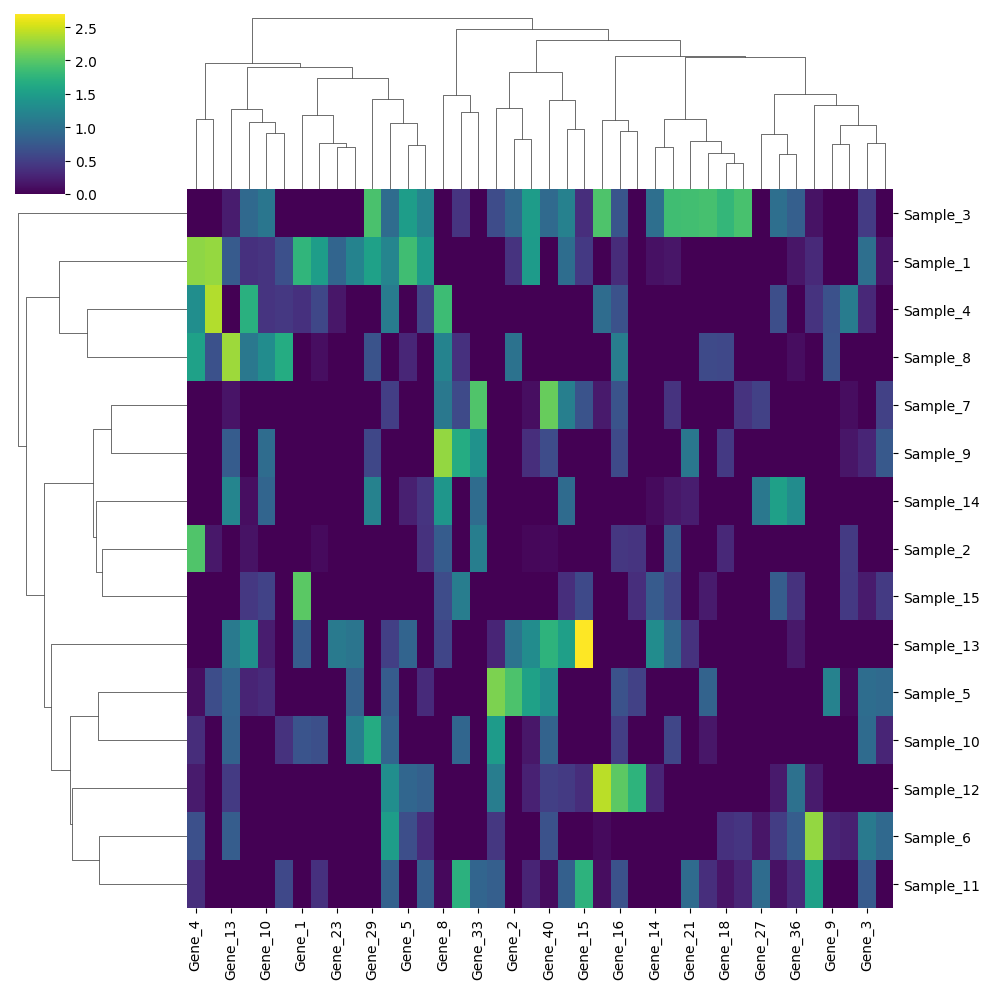

In [ ]:

# Using seaborn's clustermap function to create a clustered heatmap
cg = sns.clustermap(df_gene_expression, method='ward', cmap='viridis')#, standard_scale=1)

# # Customizing the plot (optional)
# plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Rotate row labels if needed
# plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90) # Rotate column labels if needed
# plt.show()


# Optional Exercise -- Principal component analysis (PCA) (+15 pts)

Based on their expression profiles samples can be embedded into a lower dimensional (latent) space.

Principal Component Analysis (PCA) simplifies high-dimensional data by transforming it to a lower-dimensional space. It does this by rotating the dataset to maximize variance, revealing 'principal components'. These components allow us to visualize the data, highlighting sample similarities and identifying outliers more effectively.

Use the PCA functionality from the sklearn module to do that with our gene expression data. The result should be a scatter plot that have the principal component 1 as the x-axis and the principal component 2 as the y-axis. The data points should be Sample_1, Sample_2, ... (ideally annotated) that are distributed according to their profile similarity to the other sample points.

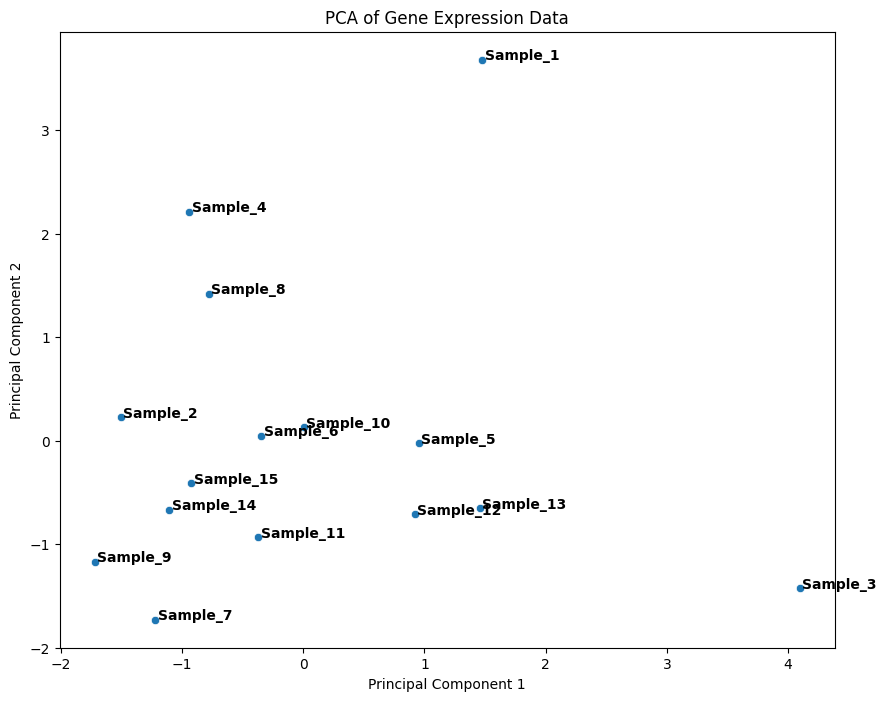

In [ ]:
from sklearn.decomposition import PCA
# Performing PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(df_gene_expression)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, index=df_gene_expression.index, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotating each point with its sample ID
for line in range(0, pca_df.shape[0]):
     plt.text(pca_df.PC1[line]+0.02, pca_df.PC2[line],
              pca_df.index[line], horizontalalignment='left',
              size='medium', color='black', weight='semibold')

plt.show()

# Plotting with seaborn

Once the data is in the right format, the plotting is usually straightforward. The plotting functions can often just be called by specifying which variables should be on which axes. The following cell creates an example dataframe and visualizes it via a barplot.

    Veggie  Weight
0    Onion     3.4
1    Onion     3.1
2    Onion     3.1
3    Onion     3.2
4   Garlic     0.5
5   Garlic     0.3
6   Garlic     0.4
7   Garlic     0.3
8   Potato     7.4
9   Potato     3.8
10  Potato     6.5
11  Potato     4.0


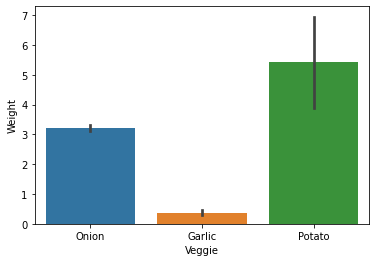

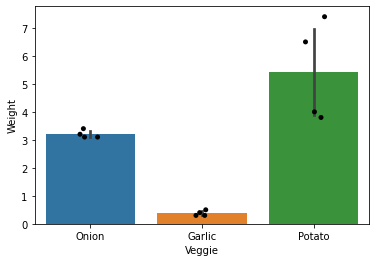

In [ ]:
import seaborn as sns

weights = pd.DataFrame(
    {
     'Onion': [3.4, 3.1, 3.1, 3.2],
     'Garlic': [0.5, 0.3, 0.4, 0.3],
     'Potato': [7.4, 3.8, 6.5, 4.0]
    }
)

weights_long = pd.melt(weights, value_name='Weight', var_name='Veggie')
print(weights_long)

# plot a barplot
sns.barplot(x='Veggie', y='Weight', data=weights_long)
plt.show()

# plot a barplot with the data points on top
sns.barplot(x='Veggie', y='Weight', data=weights_long)
sns.stripplot(x='Veggie', y='Weight', data=weights_long, color='black')
plt.show()

In [ ]:
sns.__version__

'0.11.2'

# Task 1 [30 points] - Visualizing gene expression

In the previous statistics exercise we have assigned the cells to clusters based on their similarities in their expression profiles. Now we want to see how the gene `CST3` is expressed in the four different cell clusters we have created. Plot the log-normalized counts of the gene 'CST3' across the clusters using

*   a barplot (`sns.barplot()`) [10 points]
*   a boxplot (`sns.boxplot()`) [5 points]
*   a violinplot (`sns.violinplot()`) but without the small boxplots inside [5 points]
*   a violinplot with the points on top (`sns.violinplot()` + `sns.stripplot()`) [5 points]
*   a density plot (`sns.kdeplot()`, with the density on the y-axis) [5 points]

For detailed usage of the functions use the manual pages online or other websites.

                     cell  cluster  gene    counts
3222436  AAACATACAACCAC-1      1.0  CST3  0.000000
3222437  AAACATTGAGCTAC-1      0.0  CST3  3.038826
3222438  AAACATTGATCAGC-1      1.0  CST3  3.545876
3222439  AAACCGTGCTTCCG-1      2.0  CST3  6.331901
3222440  AAACGCACTGGTAC-1      1.0  CST3  0.000000
...                   ...      ...   ...       ...
3224440  TTTCAGTGTCACGA-1      0.0  CST3  0.000000
3224441  TTTCCAGAGGTGAG-1      1.0  CST3  4.348158
3224442  TTTCGAACACCTGA-1      0.0  CST3  5.069193
3224443  TTTCGAACTCTCAT-1      2.0  CST3  6.331719
3224444  TTTCTACTGAGGCA-1      0.0  CST3  3.367682

[2009 rows x 4 columns]


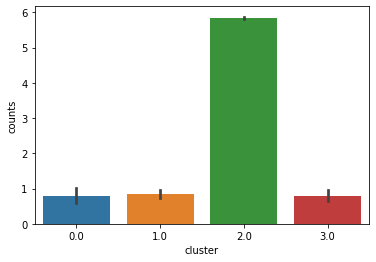

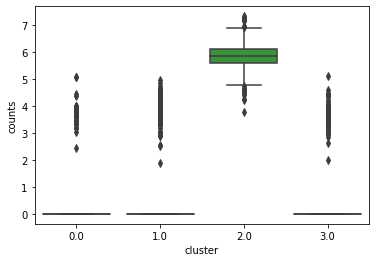

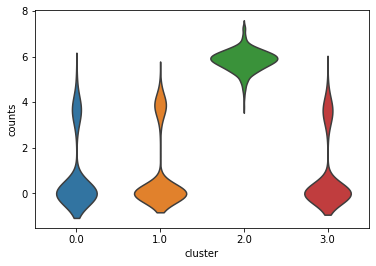

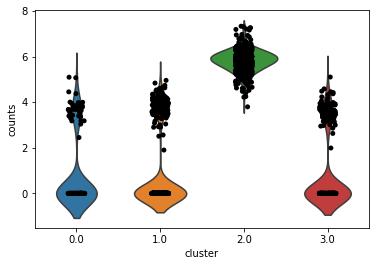

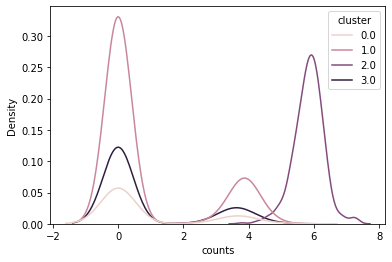

In [ ]:
# Task 1

cst3 = long_df.loc[long_df['gene'] == 'CST3', :]

print(cst3)

sns.barplot(data=cst3, x='cluster', y='counts')
plt.show()

sns.boxplot(data=cst3, x='cluster', y='counts')
plt.show()

sns.violinplot(data=cst3, x='cluster', y='counts', inner=None)
plt.show()

sns.violinplot(data=cst3, x='cluster', y='counts')
sns.stripplot(data=cst3, x='cluster', y='counts', color='black')
plt.show()

sns.kdeplot(data=cst3, x='counts', hue='cluster')
plt.show()

In [ ]:
print(type(cst3))

<class 'pandas.core.frame.DataFrame'>


# Task 2 [50 points] - Heatmaps

Heatmaps are often used for visualizing gene expression data, especially in combination with clustering. They are useful to see similar patterns in gene expressions among different samples (in our case cells). In the following tasks we will try to plot the clustering we have done in a heatmap.

**Task 2.1 [5 points]:** Plot a heatmap of the `counts` dataframe using the `sns.heatmap` function.


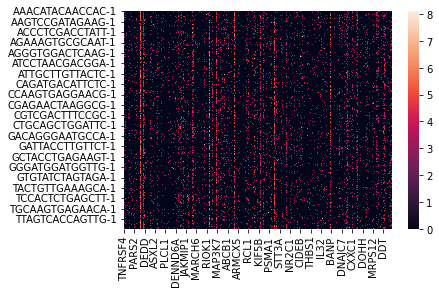

In [ ]:
# 2.1
sns.heatmap(counts)
plt.show()

You can see that a heatmap of the full data itself does not reveal many patterns directly. This is partly due to the large number of genes we are plotting. So as a first step we want to show only the genes which have strong differences in their expression across the clusters (like CST3 which is a lot stronger expressed in one cluster than the others as we have seen in the previous task). The following code uses functionalities of pandas dataframes to compute the variance of each gene across the different clusters. Subsequently it ranks the genes by decreasing variance, meaning that the genes which show the strongest differences between clusters should be on top.

In [ ]:
# compute the mean expression for each cluster and gene
g = long_df.groupby(['cluster', 'gene'])
mean_per_cluster = g.mean()['counts'].reset_index()
# compute the variance across the mean expressions
g = mean_per_cluster.groupby(['gene'])
var_cluster = g.var()['counts']
# create an array of gene names that is sorted by decreasing variance
most_var_genes = var_cluster[np.argsort(var_cluster)[::-1]].index

**Task 2.2 [15 points]:** Plot a heatmap with all cells but only the 50 most variable genes across clusters (the first 50 genes in the array `most_var_genes`).

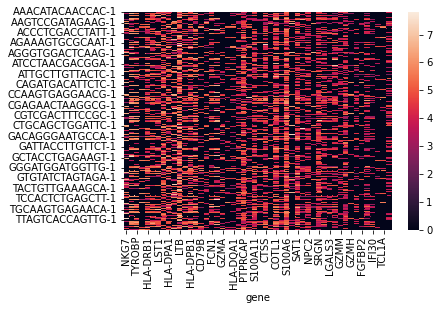

In [ ]:
# 2.2
counts_var = counts.loc[:, most_var_genes[0:50]]

sns.heatmap(counts_var)
plt.show()

**Task 2.3 [20 points]:** Plot the same heatmap as in 2.2 but order the cells based on cluster labels in the `label` array. This results in cells which are in the same cluster being next to each other in the heatmap.  (Hint: the function `np.argsort()` might help you). Can you see the 4 clusters?

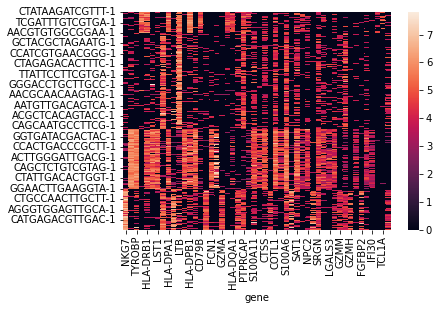

In [ ]:
# 2.3
counts_sorted = counts_var.iloc[np.argsort(labels), :]
sns.heatmap(counts_sorted)
plt.show()

You can tell seaborn to do the clustering for you, it can cluster cells and genes at the same time, resulting in a nice heatmap.

**Task 2.4 [5 points]:** Use the `sns.clustermap()` function to plot the counts of all cells and the 50 most variable genes.

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


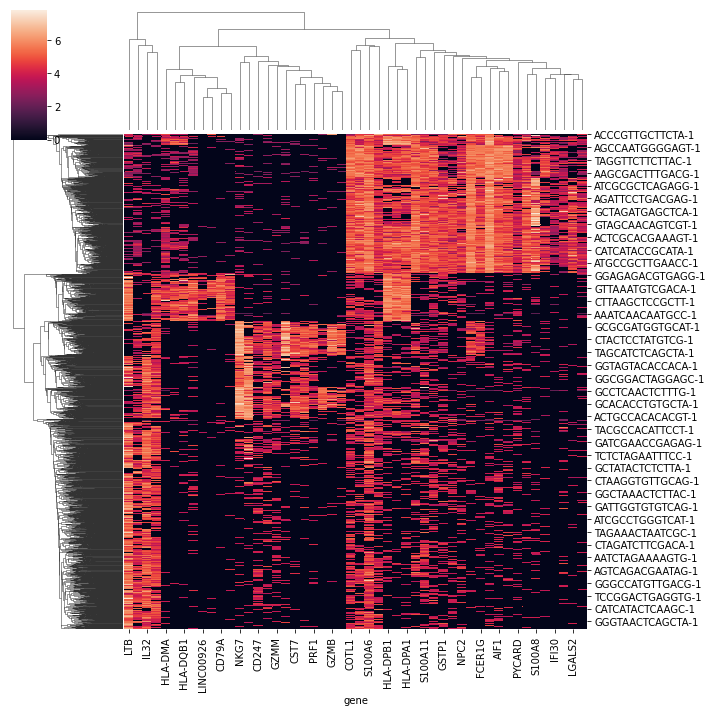

In [ ]:
# 2.4
sns.clustermap(counts_var)

# Task 3 [20 points] - 3D Plot

In the previous statistics session we reduced the dimensionality of the gene count matrix and plotted their projection to the first 2 principal components. Here we use a public library to compute the principal components and project the count matrix to the first three. Use the function `scatter_3d()` from the library `plotly.express` to plot the reduced data matrix `counts_reduced` and color the points by their cluster labels stored in `labels`.

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
pca.fit(counts.loc[:, genes].transpose())
counts_reduced = pca.components_


In [ ]:
# 3
fig = px.scatter_3d(x=counts_reduced[0,:], y=counts_reduced[1,:], z=counts_reduced[2,:],
              color=labels)
fig.show()

# Extratask [10 points]

Write a function that takes as input
*  the dataframe with the gene expression counts (cells as rows, genes as columns)
*  an array with cluster labels (one for each cell -> same length as rows of count matrix)

The function should then compute:
*  the mean gene expression per cluster and return it as dataframe with cells as rows and clusters as columns
*  the variance of the different mean gene expressions across clusters for every gene and return it as array with the same order as the columns of the input dataframe

In [ ]:
def mean_variance(counts, labels):
  df = counts.copy()
  df.loc[:, 'cell'] = df.index
  df.loc[:, 'cluster'] = labels.astype(int)
  long_df = pd.melt(df, id_vars=('cell', 'cluster'), var_name='gene', value_name='counts')

  g = long_df.groupby(['gene', 'cluster'])
  means = g.mean()

  g = means.groupby('gene')
  variances = g.var()

  return (
      means['counts'].reset_index('cluster').pivot(columns='cluster'),
      np.array(variances['counts'])
  )

print(mean_variance(counts,labels))
print('test')

(           counts                              
cluster         0         1         2         3
gene                                           
7SK-2    0.058491  0.000000  0.004983  0.021036
AAGAB    0.087843  0.139896  0.111791  0.191508
AAR2     0.125082  0.109568  0.074609  0.083600
AATF     0.540330  0.414844  0.381944  0.523307
ABCB1    0.019192  0.042895  0.011090  0.112898
...           ...       ...       ...       ...
ZRANB3   0.098789  0.032103  0.009613  0.014563
ZSWIM6   0.000000  0.017655  0.058450  0.010596
ZUFSP    0.142532  0.081315  0.068209  0.071876
ZWINT    0.016049  0.026983  0.014917  0.056227
ZYX      0.189099  0.412438  1.181111  0.365135

[1857 rows x 4 columns], array([0.00070101, 0.00198649, 0.00054051, ..., 0.0012115 , 0.0003702 ,
       0.19365595]))
test
